            cor_job_count  ind_job_count
month_name                              
January              6411          19997
February             5486          18655
March                6441          20398
April                6589          19807
May                  6498          20109
June                 6293          19376
July                 7371          21397
August               6846          20818
September            7041          20859
October              7407          21807
November             7377          22705
December             7665          23623


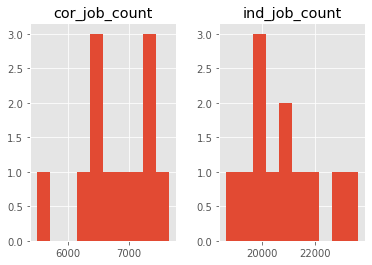

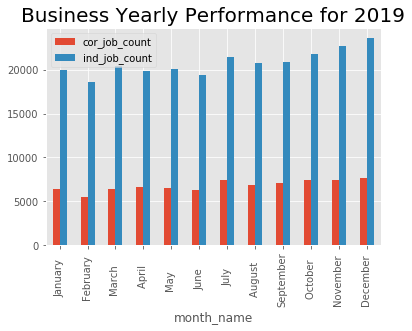

Individual_Job_count
[19997, 18655, 20398, 19807, 20109, 19376, 21397, 20818, 20859, 21807, 22705, 23623] 

Corporate_Job_count
[6411, 5486, 6441, 6589, 6498, 6293, 7371, 6846, 7041, 7407, 7377, 7665] 



In [3]:
""""
--Corporate Jobs half yearly for 2019 (Data Analysis)
select extract(MONTH from c.created_date) as Month,to_char(c.created_date,'Month') as Month_Name,count(c.*) as Job_Count
from component c
join enquiry e on c.enquiry_id = e.id and e.active=true
join eos_user eu on e.eos_user_id = eu.id and eu.active=true
where eu.client_type='corporate'
and c.component_type='job'
and extract(MONTH from c.created_date) in (1,2,3,4,5,6,7,8,9,10,11,12)
group by extract(MONTH from c.created_date),to_char(c.created_date,'Month');

--Individual Jobs half yearly for 2019 (Data Analysis)
select extract(MONTH from c.created_date) as Month,to_char(c.created_date,'Month') as Month_Name,count(c.*) as Job_Count
from component c
         join enquiry e on c.enquiry_id = e.id and e.active=true
         join eos_user eu on e.eos_user_id = eu.id and eu.active=true
where eu.client_type='individual'
  and c.component_type='job'
  and extract(MONTH from c.created_date) in (1,2,3,4,5,6,7,8,9,10,11,12)
group by extract(MONTH from c.created_date),to_char(c.created_date,'Month');"""
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline
style.use("ggplot")
df_corporate = pd.read_csv("C:\\Program Files\\Python36\\suven\\corporate_jobs_yearly_performance.csv",index_col=0)
df_individual = pd.df = pd.read_csv("C:\\Program Files\\Python36\\suven\\individual_jobs_yearly_performance.csv",index_col=0)
df_corporate = df_corporate.rename(columns={"job_count":"cor_job_count"})
df_individual = df_individual.rename(columns={"job_count":"ind_job_count"})
merge_frame = pd.merge(df_corporate,df_individual)
merge_frame = merge_frame.set_index(["month_name"])
merge_frame_diff = merge_frame.reindex(columns=['cor_job_count','ind_job_count'])
print(merge_frame_diff)
merge_frame_diff.plot(kind = 'bar')
plt.title("Business Yearly Performance for 2019",fontsize=20)
plt.show()
print('Individual_Job_count')
print(merge_frame.ind_job_count.tolist(),'\n')
print('Corporate_Job_count')
print(merge_frame.cor_job_count.tolist(),'\n')